In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set_style("whitegrid")

In [3]:
df = pd.read_csv("../data/car.csv")

df.head()

,Brand,Year,Driven_kms,Fuel_Type,Transmission,Seller_Type,Owner,City,Selling_Price_Lakh
0,Tata,2023,120255,Petrol,Automatic,Dealer,1,Chennai,3.54
1,Maruti,2010,192705,CNG,Manual,Dealer,1,Delhi,0.50
2,Maruti,2014,168980,CNG,Automatic,Dealer,1,Hyderabad,0.50
3,Kia,2023,107210,Petrol,Automatic,Individual,2,Mumbai,5.55
4,Renault,2009,48862,Electric,Automatic,Individual,0,Pune,1.35


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               10000 non-null  str    
 1   Year                10000 non-null  int64  
 2   Driven_kms          10000 non-null  int64  
 3   Fuel_Type           10000 non-null  str    
 4   Transmission        10000 non-null  str    
 5   Seller_Type         10000 non-null  str    
 6   Owner               10000 non-null  int64  
 7   City                10000 non-null  str    
 8   Selling_Price_Lakh  10000 non-null  float64
dtypes: float64(1), int64(3), str(5)
memory usage: 703.3 KB


In [5]:
df.describe()

,Year,Driven_kms,Owner,Selling_Price_Lakh
count,10000.000000,10000.000000,10000.00000,10000.000000
mean,2016.000700,102154.158800,0.98600,2.796526
std,4.930814,56474.941243,0.81466,2.357806
min,2008.000000,5012.000000,0.00000,0.500000
25%,2012.000000,53308.750000,0.00000,0.500000
50%,2016.000000,102004.500000,1.00000,2.230000
75%,2020.000000,150876.750000,2.00000,4.360000
max,2024.000000,199995.000000,2.00000,12.070000


In [6]:
df["Car_Age"] = 2024 - df["Year"]
df.head()

,Brand,Year,Driven_kms,Fuel_Type,Transmission,Seller_Type,Owner,City,Selling_Price_Lakh,Car_Age
0,Tata,2023,120255,Petrol,Automatic,Dealer,1,Chennai,3.54,1
1,Maruti,2010,192705,CNG,Manual,Dealer,1,Delhi,0.50,14
2,Maruti,2014,168980,CNG,Automatic,Dealer,1,Hyderabad,0.50,10
3,Kia,2023,107210,Petrol,Automatic,Individual,2,Mumbai,5.55,1
4,Renault,2009,48862,Electric,Automatic,Individual,0,Pune,1.35,15


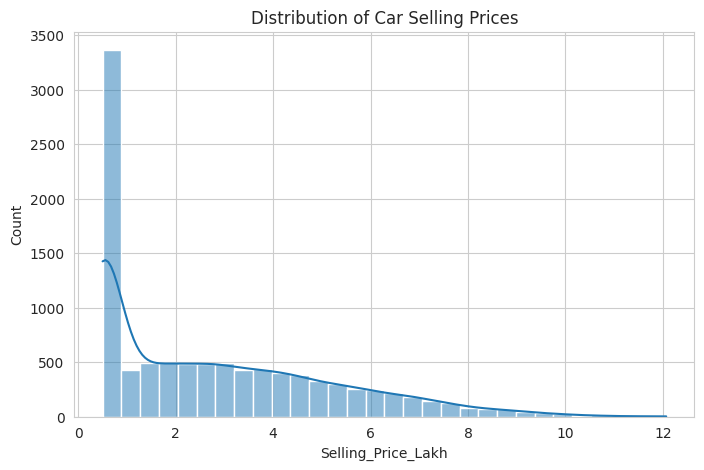

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df["Selling_Price_Lakh"], bins=30, kde=True)
plt.title("Distribution of Car Selling Prices")
plt.show()

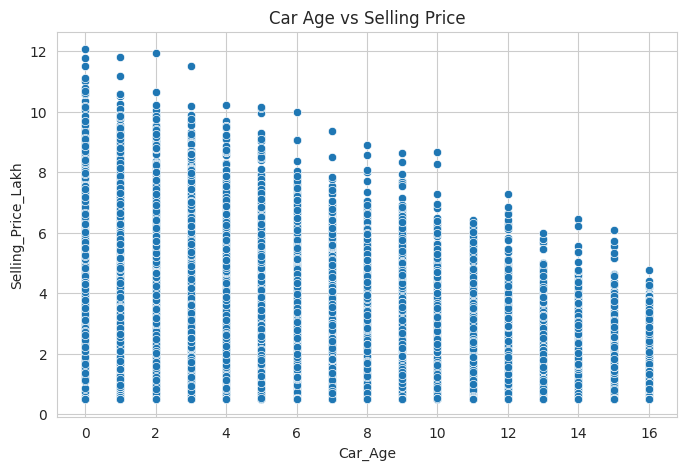

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Car_Age", y="Selling_Price_Lakh", data=df)
plt.title("Car Age vs Selling Price")
plt.show()

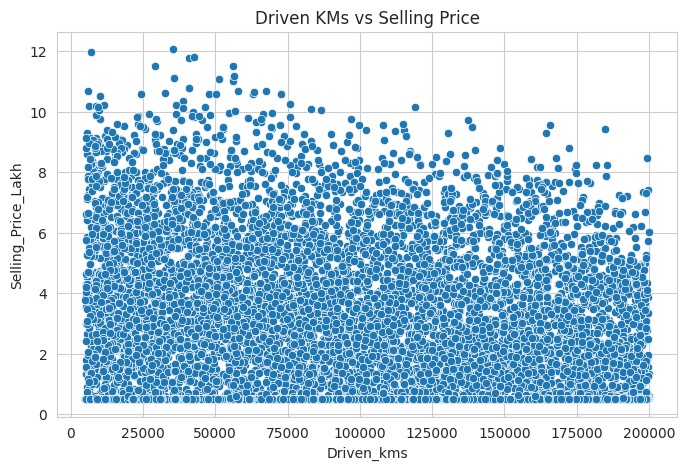

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Driven_kms", y="Selling_Price_Lakh", data=df)
plt.title("Driven KMs vs Selling Price")
plt.show()

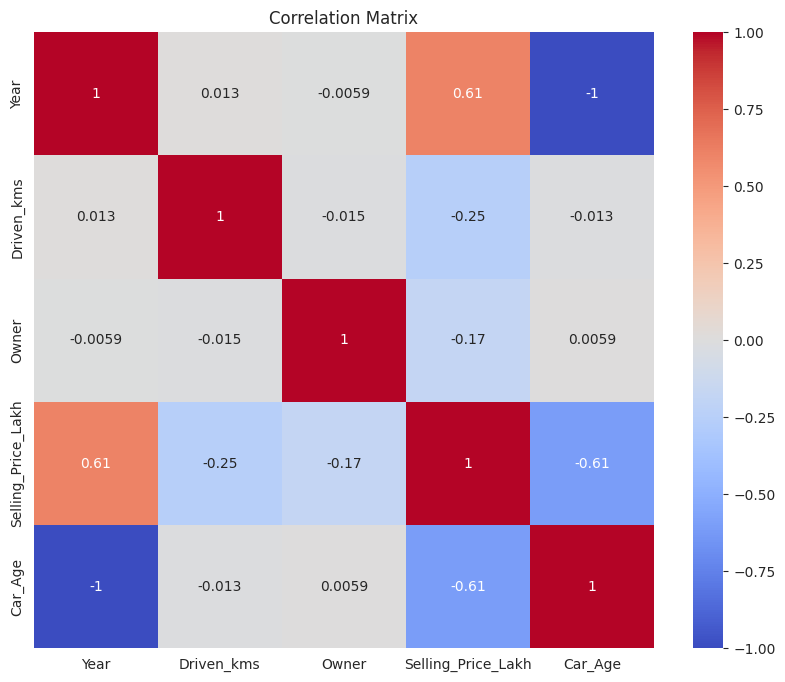

In [10]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [11]:
df.drop("Year", axis=1, inplace=True)

df = pd.get_dummies(df, drop_first=True)

df.head()

,Driven_kms,Owner,Selling_Price_Lakh,Car_Age,Brand_Hyundai,Brand_Kia,Brand_Mahindra,Brand_Maruti,Brand_Renault,Brand_Skoda,...,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,City_Pune
0,120255,1,3.54,1,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
1,192705,1,0.50,14,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
2,168980,1,0.50,10,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,107210,2,5.55,1,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
4,48862,0,1.35,15,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True


In [12]:
X = df.drop("Selling_Price_Lakh", axis=1)
y = df["Selling_Price_Lakh"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)

rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [15]:
y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)

MAE : 0.48662
RMSE: 0.6567337066555212
R2  : 0.9245143204526026


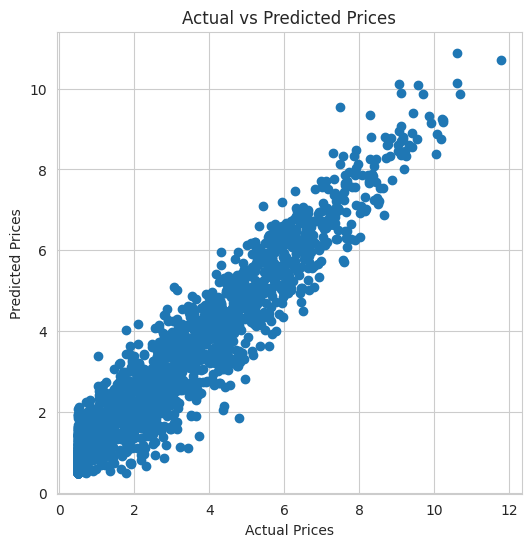

In [16]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

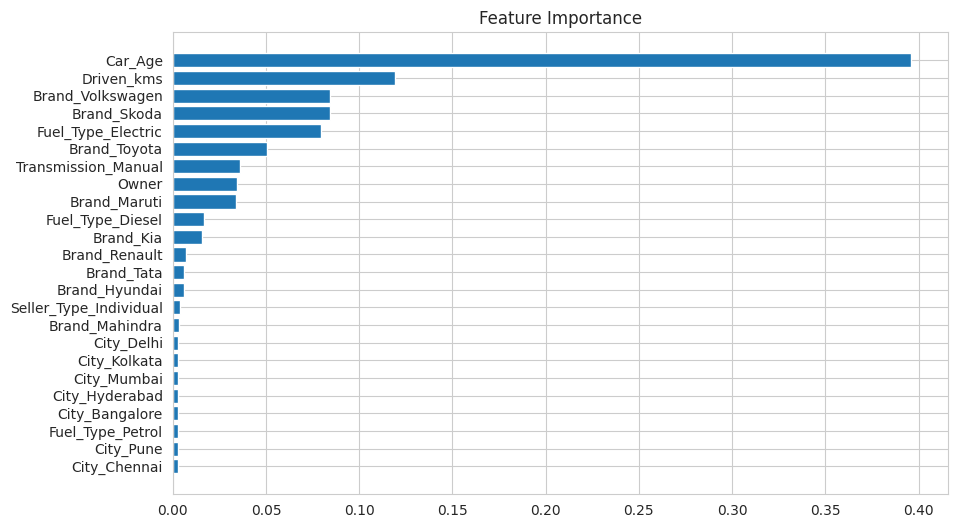

In [17]:
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.barh(features[indices], importances[indices])
plt.title("Feature Importance")
plt.show()

In [18]:
joblib.dump(rf, "../models/rf_model.pkl")

['../models/rf_model.pkl']